# Visualisierung von CO2-Daten

<div style="padding: 10px; border: 2px solid green; background-color: #ccffcc; color: darkgreen; font-size: 16px;">
  <strong>Achtung:</strong> Wenn Sie die Bearbeitung dieser Aufgabe erneut aufnehmen, dann führen Sie bitte immer alle Codezellen, angefangen bei 'Bibliotheken (Libraries) importieren', erneut aus!
</div>

## Einleitung

In dieser Aufgabe werden Sie eine Visualisierung der CO2-Konzentration auf dem Meeresspiegel darstellen. Der Visualisierungsprozess gliedert sich in drei Teile:
1. Daten lesen und bereinigen
2. Zeichnen der Grundkarte (Karte der Erde)
3. Zeichnen der Datenpunkte mit verschiedenen Farbcodes auf der Grundkarte

Dieser einführende Use case ist, wie die übrigen Uses cases, untergliedert in nacheinander zu programmierende sogenannte Programmierzellen. Nachdem jede einzelne der Programmierzelle programmiert wurde, muss der sie enthaltene Code einmalig gestartet werden. Dies geschieht, indem die Zelle markiert und Shift+Enter (gleichzeitiges Drücken der Umschalttaste und Enter-Taste) betätigt wird. Alternativ können Sie jederzeit eine markierte Zelle über den Pfeil nach rechts ('Run this cell and advance') in der oberen Menüzeile starten. Dadurch wird der im Code beschriebene Data Science Auftrag ausgeführt und das Ergebnis festgeschrieben. 
Die einzelnen Programmierzellen bauen dabei sukzessive aufeinander auf. D.h. Ergebnisse der einen Zelle können in der darauffolgenden Zelle verwendet werden. Teilergebnisse, d.h. Ergebnisse einer Zelle, können als Zwischenschritt ausgegeben oder visualisiert werden. 

Wir leiten Sie bei der Programmierung jeder einzelnen Zelle immer wieder an, indem wir zum einen fertigen Code bereits zur Verfügung stellen, andererseits immer wieder auch auf die vorhandene Referenzdokumentation sowie Beispiel-Applikationen verweisen, die Ihnen die Programmierung des eigenen Codes erleichtern. Nutzen Sie unbedingt diese Hilfsangebot in den Erläuterungen zu den einzelnen Programmierzellen.

Bitte füllen Sie nun die folgenden Programmierzellen mit ihren spezifischen Funktionen aus, um die Aufgaben zu erledigen.

## Bibliotheken (Libraries) importieren

Bevor Sie mit der eigentlichen Programmierung beginnen, müssen alle Pakete vollständig importiert werden. Führen Sie hierzu die folgende Programmierzelle aus, indem Sie die Zelle mit der Maus markieren und Shift+Enter betätigen. Den Code in der Programmierzelle weiter unten brauchen Sie dabei nicht zu ändern. Wir haben alles bereits für Sie vorbereitet. Nach der Ausführung der Programmierzelle warten Sie bitte, bis der Kernel-Status wieder auf 'idle' springt. Es erscheint dann wieder das weiße leere Kreissymbol oben rechts neben 'DHBW-Kurs'.

In [1]:
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
from matplotlib.cm import ScalarMappable
import seaborn as sns
import matplotlib
from matplotlib.widgets import RangeSlider
from matplotlib.widgets import Button
import boto3
import json

## 1. Daten einlesen und bereinigen

Der folgende Code speichert zunächst den Pfad zu den Daten in der Variablen `data_path` (s. letzte Programmierzeile innerhalb der Zelle). Unter diesem Pfad werden später die CO2-Daten im sogenannten ***csv-Format*** gespeichert. Das csv-Format steht für 'Comma-separated values' und fügt sämtliche Daten nacheinander in einer Textdatei geordnet zusammen, separiert durch ein Komma oder Semikolon.

Sie brauchen diesen Code wiederum nicht zu ändern; er greift automatisch auf die Kurs-Datenbank zu. Die Zelle sollten Sie lediglich wie oben beschrieben ausführen und warten, bis der Kernel wieder idle ist, also wieder zur Verfügung steht. Überprüfen Sie hierzu bitte wieder das Kreissysmbol oben rechts neben 'DHBW-Kurs', nachdem Sie die Programmausführung der Zelle mit Shift+Enter gestartet haben.

<div align="center">
    <video width="560" height="320" 
       src="../../videos/CO2-Aufgabe1.0.mp4"  
       controls>
    </video>
</div>

In [2]:
data_path = '/mnt/CO2/CO2data.csv'

#### Aufgabe 1.1 csv-Datei einlesen

Bitte verwenden Sie die Funktion ``pd.read_csv()`` der Python-Bibliothek 'pandas' (abgekürzt 'pd'), um nun die Daten einzulesen. Diese Funktion sollte Daten in tabellarischer Form zurückgeben. 

**Achtung!!**: Die Bearbeitung dieser Zelle (also nachdem Sie die Ausführung der Programmierzelle mit Hilfe von Shift+Enter gestartet haben) kann bis zu 10 Minuten andauern. Achten Sie bitte in diesem Fall unbedingt darauf, dass Sie die nachfolgende Programmierzelle erst dann anstoßen, wenn der Kernel wieder idle, also verfügbar ist!!

Während die Zelle rechnet bzw. 'busy' ist, möchten Sie evtl. mehr über die Pandas-Bibliothek bzw. deren ``pd.read_csv()`` erfahren. Gerne dürfen Sie sich also in der kleinen Pause folgende Hilfeseiten anschauen:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
- https://www.w3schools.com/python/pandas/pandas_csv.asp

<div align="center">
    <video width="560" height="320" 
       src="../../videos/CO2-Aufgabe1.1.mp4"  
       controls>
    </video>
</div>

In [3]:
data = pd.read_csv(data_path, usecols = ['longitude [dec.deg.E]','latitude [dec.deg.N]','fCO2rec [uatm]','yr'])

#### Aufgabe 1.2 Überblick über die Daten

Prüfen Sie nun, ob die 'read_csv'-Funktion die Daten korrekt als sogenanntes **Dataframe** zurückgibt und in der Variablen 'data' abgespeichert hat. Die Ausgabe für diesen Test sollte dabei generell wie folgt aussehen:

| Column 1 Header | Column 2 Header | Column 3 Header |
|-----------------|-----------------|-----------------|
| Row 1, Col 1    | Row 1, Col 2    | Row 1, Col 3    |
| Row 2, Col 1    | Row 2, Col 2    | Row 2, Col 3    |
| Row 3, Col 1    | Row 3, Col 2    | Row 3, Col 3    |

Verwenden Sie bitte hierzu die **DataFrame.head** Funktion, welche in unserem Fall auf der Variablen 'data' operiert (**data.head()**) und geben Sie die ersten 5 Zeilen aus. Nutzen Sie hierzu gerne die in den folgenden Links gezeigten Funktions-Definitonen (Referenz-Dokumentation) und Anwendungs-Beispiele:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
- https://www.w3resource.com/pandas/dataframe/dataframe-head.php

Achten Sie auch für diese Programmierzelle auf den Kernel, der nach Ausführung wieder seine Verfügbarkeit anzeigen sollte (weißer leerer Kreis)!

<div align="center">
    <video width="560" height="320" 
       src="../../videos/CO2-Aufgabe1.2.mp4"  
       controls>
    </video>
</div>

In [4]:
# BEGIN SOLOTION
data.head(5)
# END SOLUTION

,yr,longitude [dec.deg.E],latitude [dec.deg.N],fCO2rec [uatm]
0,2018,355.68784,47.74534,340.024
1,2018,355.68822,47.74525,339.813
2,2018,355.68858,47.74516,339.653
3,2018,355.68895,47.74508,339.460
4,2018,355.68930,47.74500,339.332


Verschaffen Sie sich nun einen Überblick über diesen Datensatz, um zu sehen, welche Spalten vorhanden sind und ob es fehlenden Daten gibt. Diese Informationen erhalten wir über die in der Pandas-Bibliothek bereits zur Verfügung gestellte Funktion 'info'. Die 'info'-Funktion muss als Quelle wieder unsere Daten im zugrundeliegenden Dataframe 'data' benutzen (data.info()). Wenn Sie, wie im Beispiel unten die Anzahl der Nicht-Null-Einträge ausgeben lassen wollen, müssen Sie dies innerhalb der info-Funktion mit dem Parameter 'show_counts = True' bestätigen.

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [5]:
data.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37905760 entries, 0 to 37905759
Data columns (total 4 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   yr                     37905760 non-null  int64  
 1   longitude [dec.deg.E]  37905760 non-null  float64
 2   latitude [dec.deg.N]   37905760 non-null  float64
 3   fCO2rec [uatm]         37905760 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.1 GB


#### Aufgabe 1.3 Daten vorbereiten

Kalibrierung des Längengradbereichs von 0 bis 360 Grad auf -180 Grad bis 180 Grad.
Diese Kalibrierung ist zur korrekten Darstellung der Weltkarte notwendig und soll hier nicht näher erläutert werden.

In [6]:
# convert the range of longitude from [0,360] to [-180,180]
data.loc[data['longitude [dec.deg.E]']> 180,'longitude [dec.deg.E]'] = data.loc[data['longitude [dec.deg.E]']> 180,'longitude [dec.deg.E]'] -360

## 2. Zeichnen Sie die Grundkarte

In diesem Abschnitt sollten Sie zunächst eine graphische Ausgabe (engl. 'figure') erstellen und dann die sogenannte Basemap-Bibliothek verwenden, um eine Weltkarte und weitere Datenpunkte auf der gleichen graphischen Ausgabe ('figure') zu zeichnen.

Verwenden Sie hierzu bitte im ersten Schritt die **matplotlib.pyplot.figure** bzw. **plt.figure** Funktion. Definieren Sie zunächst die Größe (figsize=(x,y)) der graphischen Ausgabe ('figure') und geben Sie das Ergebnis auf die Variable mit dem Namen 'fig' zurück. Die erste Programmierzeile lautet also in etwa:
fig=plt.figure(figsize=(???, ???))
Ersetzen Sie dabei bitte die beiden ??? mit sinnvollen Werten.

Um der graphischen Ausgabe ('figure') einen Titel hinzuzufügen, verwenden Sie bitte die Funktion 'title' und einen aussagekräftigen eigenen Titel (z.B. 'CO2-Konzentration') innerhalb der Bibliothek **matplotlib.pyplot** bzw. **plt**. Die zweite Programmierzeile wird also ungefähr wie folgt aussehen:
plt.title('???')
Ersetzen Sie dabei bitte die ??? durch Ihren aussagekräftigen Titel für die graphische Ausgabe.

Hilfsseiten:
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
- https://www.scaler.com/topics/matplotlib/introduction-to-figures-in-matplotlib/

#### Aufgabe 2.1 Graphische Ausgabe erstellen

Text(0.5, 1.0, 'CO2-Konzentration')

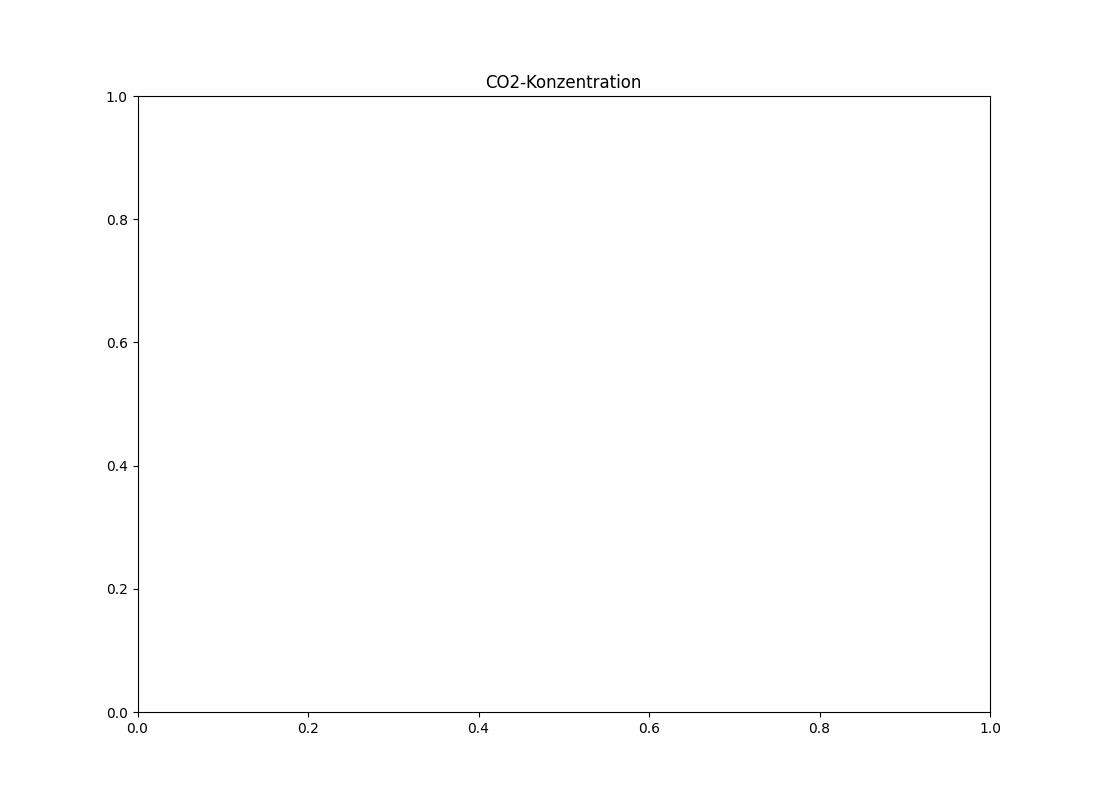

In [7]:
"""
Eine graphische Ausgabe ('figure')  erstellen
    
Variable
----------
fig : Eine figure
    
Hinweise
------------
mit plt.figure() können Sie eine figure erstellen.
Vergessen Sie nicht, einen Titel hinzuzufügen.
"""

# creat a figure
fig=plt.figure(figsize=(11, 8))
# BEGIN SOLUTION
# set a title of the figure
plt.title('CO2-Konzentration')
# END SOLUTION

#### Aufgabe 2.2 Grundkarte

Nachdem Sie die graphische Ausgabe als 'figure' entworfen haben, sollten Sie nun diese 'figure' erneut verwenden, um hierauf die Weltkarte einzuzeichnen. 
Bitte beachten Sie beim Zeichnen der Weltkarte auf die folgenden zwei Punkte:
- Bitte geben Sie den Maßstab und die Einheiten für die x- und y-Achse an.
- Bitte zeichnen Sie zusätzlich ein Gitternetz (Längen- und Breitengrade) auf die 'figure'.

Wichtig;: Sämtliche 'Basemap'-Funktionen werden auf der Variablen 'm' operieren, also folgende Form haben: 'm.Funktion()' bzw. 'm.Funktion(Parameterliste)'. 

Die für diese Aufgabe notwendigen Teilschritte sind:
1. Zeichnen Sie zunächst sämtliche Küstenlinien (basemap-Funktion 'drawcoastlines()')
2. Graphisches Ausfüllen aller Kontinente (basemap-Funktion: 'fillcontinents()')
3. Einzeichnen der Längen- und Breitengrade (basemap-Funktionen: 'drawparallels' sowie 'drawmeridians'). Dabei sieht die Programmierzeile für drawparallels() - und analog zu drawmeridians() - in etwa wie folgt aus: m.drawparallels([???,???,???,???],labels=[???,???,???,???]). Ersetzen Sie bitte die ??? mit sinnvollen Werten.

Verwenden Sie für diese Programmierzelle die Python-Library (Bibliothek) **basemap**. In deren Dokumentationen finden Sie viele beispielhafte und für Ihre Aufgabe verwertbare Codezeilen:
- https://matplotlib.org/basemap/stable/users/geography.html
- https://matplotlib.org/basemap/stable/users/graticule.html
- https://matplotlib.org/basemap/stable/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawparallels

Die Programmierung besteht also insgesamt aus 4 Programmierzeilen. Achten Sie bei der Ausführung auch hier bitte darauf, dass die Ausführung etwas Zeit benötigt. Der Kernel sollte wieder 'idle' sein, bevor Sie mit der nächsten Programmierzelle weiterarbeiten.

<div align="center">
    <video width="560" height="320" 
       src="../../videos/CO2-Aufgabe2.2.mp4"  
       controls>
    </video>
</div>

In [11]:
 """
Ein Grundkarte auf oben erstellte Figur zeichnen
    
Variable
----------
m : Ein Basemap
    
Hinweise
------------
Schauen Sie auf:
https://matplotlib.org/basemap/stable/
Zeichnen Sie geegnete Grundkarte auf obige Figur
"""

# draw the base map
m = Basemap(projection='mill', llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
# BEGIN SOLUTION
m.fillcontinents()
m.drawparallels([-90,-60,-30,0,30,60,90],labels=[1,0,0,0])
m.drawmeridians([-180.,-120,-60,0,60,120,180],labels=[0,0,0,1])
# END SOLUTION


{-180.0: ([<matplotlib.lines.Line2D at 0x7fe7c9f54210>],
  [Text(40030.154742485225, -400301.54742485227, '180°'),
   Text(39990124.58774274, -400301.54742485227, '180°')]),
 -120: ([<matplotlib.lines.Line2D at 0x7fe7c632cb10>],
  [Text(6685035.8419950325, -400301.54742485227, '120°W')]),
 -60: ([<matplotlib.lines.Line2D at 0x7fe7c6261610>],
  [Text(13370071.683990065, -400301.54742485227, '60°W')]),
 0: ([<matplotlib.lines.Line2D at 0x7fe7c9ddaf10>],
  [Text(20055107.5259851, -400301.54742485227, '0°')]),
 60: ([<matplotlib.lines.Line2D at 0x7fe7c61036d0>],
  [Text(26700113.213237647, -400301.54742485227, '60°E')]),
 120: ([<matplotlib.lines.Line2D at 0x7fe7c63b3f10>],
  [Text(33385149.055232678, -400301.54742485227, '120°E')]),
 180.0: ([<matplotlib.lines.Line2D at 0x7fe7c60e3050>],
  [Text(40030.154742485225, -400301.54742485227, '180°'),
   Text(39990124.58774274, -400301.54742485227, '180°')])}

#### Aufgabe 2.3 Datenpunkte auf der Weltkarte

Wir nähern uns der eigentlichen Aufgabenstellung für diesen Use Case an. 
Zeichnen Sie bitte die CO2-Konzentration an sämtlichen Messpunkten auf unserer Weltkarte ein, wobei die CO2-Konzentration farbig dargestellt werden sollte.

Verwenden Sie hierzu bitte in der Programmierzelle weiter unten folgende **scatter()**-Funktion, um die Datenpunkte einzuzeichnen (Siehe auch https://matplotlib.org/basemap/stable/users/examples.html) und ersetzen Sie bitte die im Beispielcode dargestellten ??? weiter unten mit sinnvollen Werten. Orientieren Sie sich dabei an der Matplotlib-Referenzdokumentation sowie an dem existierenden Code in der Programmierzelle. Gerne dürfen Sie auch etwas experimentieren, um das gewünschte Ergebnis zu erzielen:

    f = axes.scatter(x,y,
                  s = ???, # Größe der Datenpunkte auf Weltkarte
                  c = ???,  # Werte der CO2-Fugazität (fco2), welche wir zu unterschiedlichen Farben umwandlen möchten 
                  cmap = 'jet', # Das Farbspektrum, das wir verwenden möchten. (Blau bis Rot)
                  norm = '???', # Mit linearer Transformation können wir fco2-Werte zu Farben transferieren.

                  # Because the values concentrate in small range,
                  # so, we use a smaller range to normalize the values
                  # otherwise, we only see one color
                  vmin=np.quantile(fco2_whole,0.1), # min value used in normalization
                  vmax=np.quantile(fco2_whole,0.9)) # max value used in normalization

Hilfsseiten:
- https://matplotlib.org/basemap/stable/users/examples.html
- https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html#scatter

**Achtung!!** Die Bearbeitung dieser Funktion kann bis zu 10 Minuten andauern, weil sehr viele Datenpunkte eingezeichnet werden müssen!

In [12]:

"""
Ein Grundkarte auf oben erstellte Figur zeichnen
    
Variablen:
----------
axes : Axis auf der Figur namens fig
years: ein List -- Die Jahre von Messungen
akt_data: Pandas Dataframe --  wo die Messdaten von ausgewählten Jahren gespeichert sind
lat: Array -- Latitude von ausgewähltern Messdaten
lon: Array -- Longtitude von ausgewähltern Messdaten
fco2_whole: Array -- Werte der Konzentration von ausgewähltern Messdaten
fco2: Array -- Werte der Konzentration von ganzen Messdaten aus 1957 - 2023
x,y:  Array -- lat und lon in Koordinaten von basemap umwandeln
f:    Das Plot von Datenpunkte
m: obiges Basemap
    
Hinweise
------------
Schauen Sie auf:
https://matplotlib.org/basemap/stable/
Zeichnen Sie geegnete Grundkarte auf obige Figur
"""

axes = fig.axes[0]
        
# slice the dataframe, which contains only selected years
years = np.arange(1960, 2024)
akt_data = data.loc[data.yr.isin(years), :]

# save the data point in a list like object.
fco2_whole = data['fCO2rec [uatm]'].values
lat  = akt_data['latitude [dec.deg.N]'].values
lon  = akt_data['longitude [dec.deg.E]'].values
fco2 = akt_data['fCO2rec [uatm]'].values


# convert longitude and latitude to the coordinate, which basemap knows.                                                  
x, y = m(lon,lat)
    
# BEGIN SOLUTION
#draw the data points with different colors
f = axes.scatter(x,y,
                  s = 0.0001, # size of the point
                  c = fco2 ,  # the color of co2 concentration of each points
                  cmap = 'jet', # the colors used in colorbar
                  norm = 'linear', # use a liear normalization for the values of co2 concentration

                  # Because the values concentrate in small range,
                  # so, we use a smaller range to normalize the values
                  # otherwise, we only see one color
                  vmin=np.quantile(fco2_whole,0.1), # min value used in normalization
                  vmax=np.quantile(fco2_whole,0.9)) # max value used in normalization
# END SOLUTION


#### Aufgabe 2.4 Color bar

Um den ungefähren Wert der CO2-Konzentration anzuzeigen, zeichnen Sie schließlich einen Farbbalken auf der rechten Seite der Abbildung. 
- Verwenden Sie dabei bitte Rot für hohe Konzentrationen und Blau für niedrige Konzentrationen, und
- skalieren Sie bitte den Balken.

Verwenden Sie für diese Teilaufgabe (Programmierzelle) bitte die **plt.colorbar()**-Funktion, um einen Farbbalken (colorbar) zu zeichnen! Die colorbar-Funktion operiert auf unserer graphischen Ausgabe, welches wir auf die Variable plt abelegt haben, also plt.colorbar(). plt.colorbar() wiederum beinhaltet als einzige Programmierzeile zwei Paramter 'f' und 'label': 
- f stellt die Datenpunkte dar, stammt aus der Programmierzelle weiter oben und wird unverändert als ersten Paramterwert für plt.colorbar() übernommen
- label nimmt den Titel für die aufgezeichnete CO2-Fugazität auf. Dieser könnte bspw. 'fCO2rec [uatm]' lauten.

Hilfssseite:
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html

In [13]:

"""
Ein Colorbar auf oben erstellte Figur zeichnen
    
Parameter
----------
f:    Das Plot von Datenpunkte
"""

# BEGIN SOLUTION
plt.colorbar( f, label = ['fCO2rec [uatm]'])
# END SOLUTION

## 3. Interaktive Darstellung (Optional)

Sie haben hiermit Ihren ersten Use case erfolgreich programmiertechnisch umgesetzt und somit erfolgreich beendet. Herzlichen Glückwunsch!

Evtl. haben wir jedoch Ihren Appetit auf Weiteres angeregt? Denn der Weg zur Datenanalyse auf Basis der SOCAT-Daten ist mit Abschluss des ersten Use cases noch nicht zu Ende. Es gibt viele weitere Möglichkeiten, die vorliegenden Daten weiter zu explorieren und für Nutzer erlebbarer zu gestalten. Einiges davon wollen wir Ihnen vorstellen. Gerne dürfen Sie sich also bei Zeit und Interesse an Folgendem versuchen.

In folgenden Abschnitt werden Sie sich also optional an einer Visualisierung einer einfachen Mensch-Computer-Interaktion (human machine interface HMI) versuchen und dürfen dabei Ihrer Fantasie freien Lauf lassen! 

Als Beispiel einer solchen HMI könnte man sich vorstellen, dass der Benutzer das Jahr beliebig einstellen kann. Die Ausgabe würde dann automatisch nur die Datenpunkte darstellen, die den gewünschten Jahren entsprechen.

Keine Ahnung, wie man hier vorzugehen hat? Das ist nicht schlimm. Gerne verraten wir Ihnen zum Abschluss des vorliegenden Use cases die Lösung zu dieser Programmierzelle. Oder aber Sie schauen unter https://matplotlib.org/stable/gallery/widgets/slider_demo.html selbst nach, wie man sogenannte Slider-Elemente in eine graphische Ausgabe integrieren kann. Viel Erfolg!

**Achtung!!** Die Ausführung dieser Funktion kann bis zu 10 Minuten andauern, weil sehr viele Datenpunkte gezeichnet werden müssen!

In [22]:
def plot_co2(event):
    '''
    plot the co2 concentration on basemap (colors represent different values)
    '''
    global f2

    # BEGIN SOLUTION
    # press c for clear the scatter on the basmap
    if event.key == 'c':
        f2.remove()
    
    # press enter for draw the next time region
    if event.key == 'enter':
        try:
            f2.remove()
        except:
            None


        axes = fig.axes[0]
        
        # slice the dataframe, which contains only selected years
        years = np.arange(slider.val[0], slider.val[1] +1)
        akt_data = data.loc[data.yr.isin(years), :]

        # save the data point in a list like object.
        fco2_whole = data['fCO2rec [uatm]'].values
        lat  = akt_data['latitude [dec.deg.N]'].values
        lon  = akt_data['longitude [dec.deg.E]'].values
        fco2 = akt_data['fCO2rec [uatm]'].values


        # convert longitude and latitude to the coordinate, which basemap knows.                                                  
        x, y = m(lon,lat)

        #draw the data points with different colors
        f2 = axes.scatter(x,y,
                      s = 0.0001, # size of the point
                      c = fco2 ,  # the color of co2 concentration of each points
                      cmap = 'jet', # the colors used in colorbar
                      norm = 'linear', # use a liear normalization for the values of co2 concentration

                      # Because the values concentrate in small range,
                      # so, we use a smaller range to normalize the values
                      # otherwise, we only see one color
                      vmin=np.quantile(fco2_whole,0.1), # min value used in normalization
                      vmax=np.quantile(fco2_whole,0.9)) # max value used in normalization

        # draw the color bar.
        try:
            a = fig.axes[2]
        except:
            cb = plt.colorbar( f2, label = 'fCO2rec [uatm]')

        plt.show()
        # END SOLUTION
    
def plot_slide():
    '''
    plot a slider to select wanted time region to plot
    '''
    global slider
    slider_ax = fig.add_axes([0.15, 0.02, 0.7, 0.03])
    slider = RangeSlider(slider_ax, "Years", 1957, 2023,valinit = (2022,2023) ,valstep = 1)
    fig.subplots_adjust(bottom=0.1)

def plot_base_map():

    """
    Ein Grundkarte auf oben erstellte Figur zeichnen
    
    Parameter
    ----------
    m : Ein Basemap
    
    Hinweise
    ------------
    Schauen Sie auf:
    https://matplotlib.org/basemap/stable/
    Zeichnen Sie geegnete Grundkarte auf obige Figur
    """

    global m


    # draw the base map
    m=Basemap(projection='mill', llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')

    m.drawcoastlines()
    m.fillcontinents()
    m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

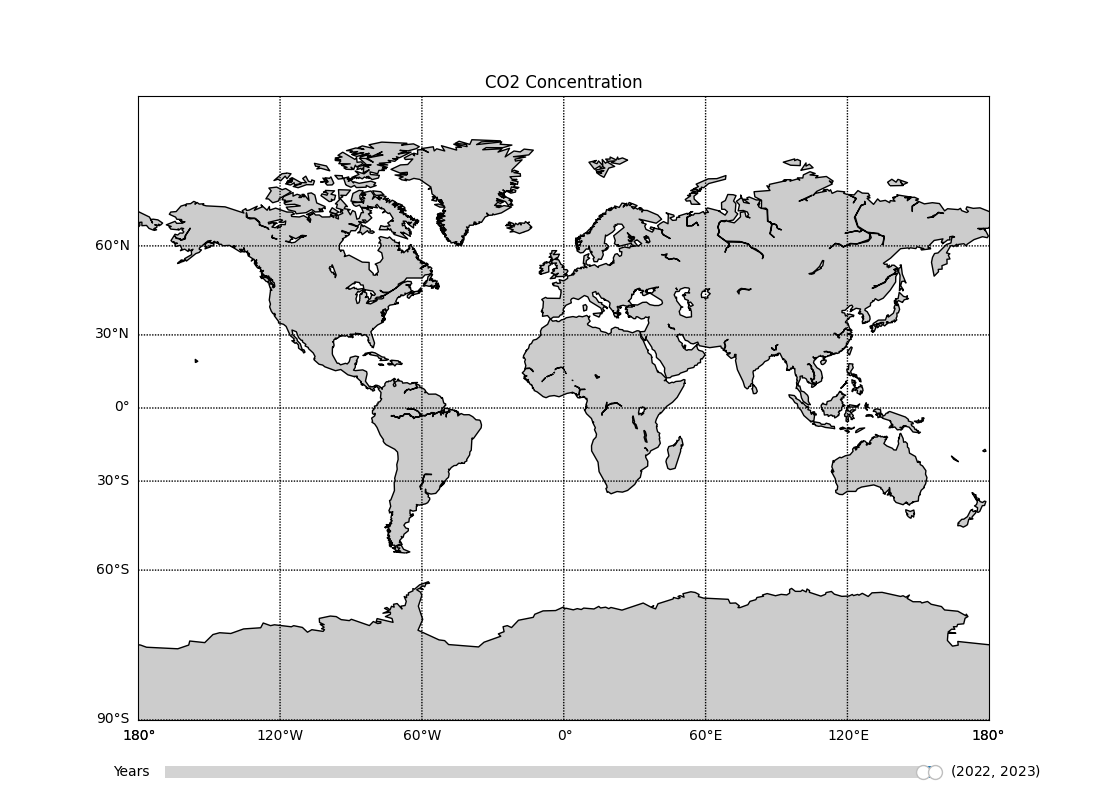

In [24]:
# creat a figure
fig=plt.figure(figsize=(11, 8))
# set a title of the figure
plt.title('CO2 Concentration')
# plot the whole world
# BEGIN SOLUTION
plot_base_map()
# plot a slider, slide the slider to select a time region.
plot_slide()
# press enter to plot, and press c to clear the scatter points
cid = fig.canvas.mpl_connect('key_press_event',plot_co2)
# END SOLUTION

Wir hoffen, dass wir Ihnen mit diesem ersten einführenden Use case einen kleinen Einblick 
in das Thema Datenanalyse (data analytics) geben konnten.
Das Thema Datenanalyse (data analytics) ist natürlich sehr vielfältiger. Dabei geht es
nicht nur um Datenvisualisierungen, sondern in erster Linie um das Erkennen verborgenen
Wissens innerhalb riesiger Datenmengen. Gerne würden wir Ihnen also in den folgenden 
Use cases weitere reale Anwendungen auf anderen Datensätzen aus der Industrie und darüber 
hinaus zeigen. 
Sind Sie neugierig geworden? Dann freuen wir uns, Sie im folgenden Use case wiederzusehen.

Haben Sie weitere Fragen und Wünsche, so freuen wir uns über Ihr Feedback!